In [8]:
import math, glob
import pickle5 as pickle
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.linewidth'] = 0.8

saveformat = '.eps' # or ''
dpi = 1200
paramtitle = False

TITLESIZE = 64
TICKSIZE  = 38
LABELSIZE = 56
LEGENDSIZE= 32

In [38]:
clip = False
k = 4

workspace = f'sp500_{k}'
directory = 'result'

windowsize = 500
loop = 5

if clip == False:
    noisypath = glob.glob(f'./{directory}/{workspace}/algo_noisy_wdw_{windowsize}_loop_{loop}_*.pickle')[0]
    ojapath   = glob.glob(f'./{directory}/{workspace}/algo_oja_wdw_{windowsize}_loop_{loop}_*.pickle')[0]
else:
    noisypath = glob.glob(f'./{directory}/{workspace}/algo_noisyclip_wdw_{windowsize}_loop_{loop}_*.pickle')[0]
    ojapath   = glob.glob(f'./{directory}/{workspace}/algo_ojaclip_wdw_{windowsize}_loop_{loop}_*.pickle')[0]  

print(ojapath)
print(noisypath)

./result/sp500_4/algo_oja_wdw_500_loop_5_049.pickle
./result/sp500_4/algo_noisy_wdw_500_loop_5_033.pickle


In [39]:
with open(ojapath, 'rb') as f:
    hyperdict  = pickle.load(f)
    list_lpwise_dict = pickle.load(f)
    
    lparam = np.power(np.asarray(hyperdict['lp_list']),-1)
    
    result = []
    for lpwise_dict in list_lpwise_dict:
        result.append(list(lpwise_dict.values()))
        
    mean = np.average(result,axis=0)
    std = np.std(result, axis=0)

with open(noisypath, 'rb') as f:
    hyperdict  = pickle.load(f)
    list_lpwise_dict = pickle.load(f)
    
    lparam_npm = hyperdict['lp_list']
    
    result_npm = []
    for lpwise_dict in list_lpwise_dict:
        result_npm.append(list(lpwise_dict.values()))
        
    mean_npm = np.average(result_npm,axis=0)
    std_npm = np.std(result_npm, axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


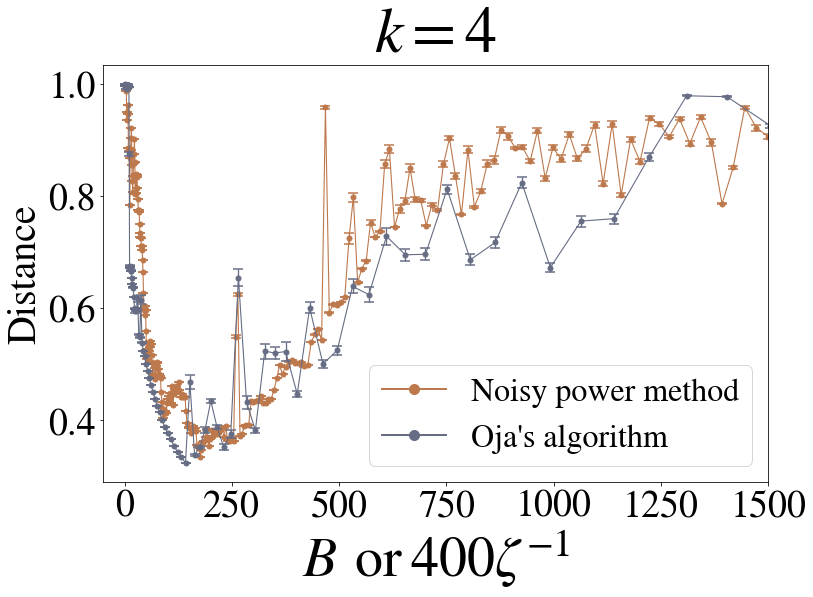

In [40]:
title = r'$k={}$'.format(k)
scale = [0, 15, 300, 150, 400, 700, 80]
scale = scale[k]

ojacolor = pl.cm.bone(0.45)
npmcolor = pl.cm.copper(0.6)

fig = plt.figure(figsize=(12,9),facecolor=(1, 1, 1))
plt.title(title,fontsize=TITLESIZE)
plt.rc('font', size=30) 

plt.plot(lparam_npm,mean_npm,'-',linewidth=1.1, marker='.',markersize=10,label='Noisy power method',c=npmcolor)
plt.errorbar(lparam_npm,mean_npm,std_npm/math.sqrt(len(lpwise_dict)),elinewidth=1.3, capsize=5, capthick=1.5, linewidth = 0.0,c=npmcolor)
plt.plot(lparam*scale,mean,'-',linewidth=1.1, marker='.',markersize=10,label='Oja\'s algorithm',c=ojacolor)
plt.errorbar(lparam*scale,mean,std/math.sqrt(len(lpwise_dict)),elinewidth=1.3, capsize=5, capthick=1.5, linewidth = 0.0,c=ojacolor)

lgnd = plt.legend(fontsize=LEGENDSIZE,loc='lower right')
for idx in range(2):
    lgnd.legendHandles[idx].set_linewidth(2)
    lgnd.legendHandles[idx].set_markersize(20)

plt.xlim(-50,1500)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.ylabel('Distance',fontsize=40)
plt.xlabel(r'$B\:\:\mathrm{or}\:$'+r'${}$'.format(scale)+r'$\zeta^{-1}$',fontsize=LABELSIZE)

plt.tight_layout()

clipword = '_clip' if clip else ''
plt.savefig('./figures/'+f'noisy_oja_sp500_k{k}{clipword}.eps',dpi=600)